In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the parameters used in the simulation
samples_per_bit_slot = 1e2
bit_rate = 1e3
side_slots_qty = 6

In [3]:
# Define the bit stream to be transmitted
bit_stream = [1, 1, 0, 0, 1, 1, 0]

In [4]:
# Compute the time instants where the simulation is evaluated at
t = np.arange(0, len(bit_stream) / bit_rate, 1 / (bit_rate * samples_per_bit_slot))

In [8]:
# Generate the waveform to be transmitted
y = np.zeros(len(t))
bit_slots = np.zeros((len(bit_stream), len(t)))
for slot_index, bit in enumerate(bit_stream):
    pulse_waveform = np.sinc(bit_rate * (t - 0.5 / bit_rate - slot_index / bit_rate))
    bit_slots[slot_index,:] = ((bit - 0.5) * 2) * pulse_waveform
    y += bit_slots[slot_index,:]

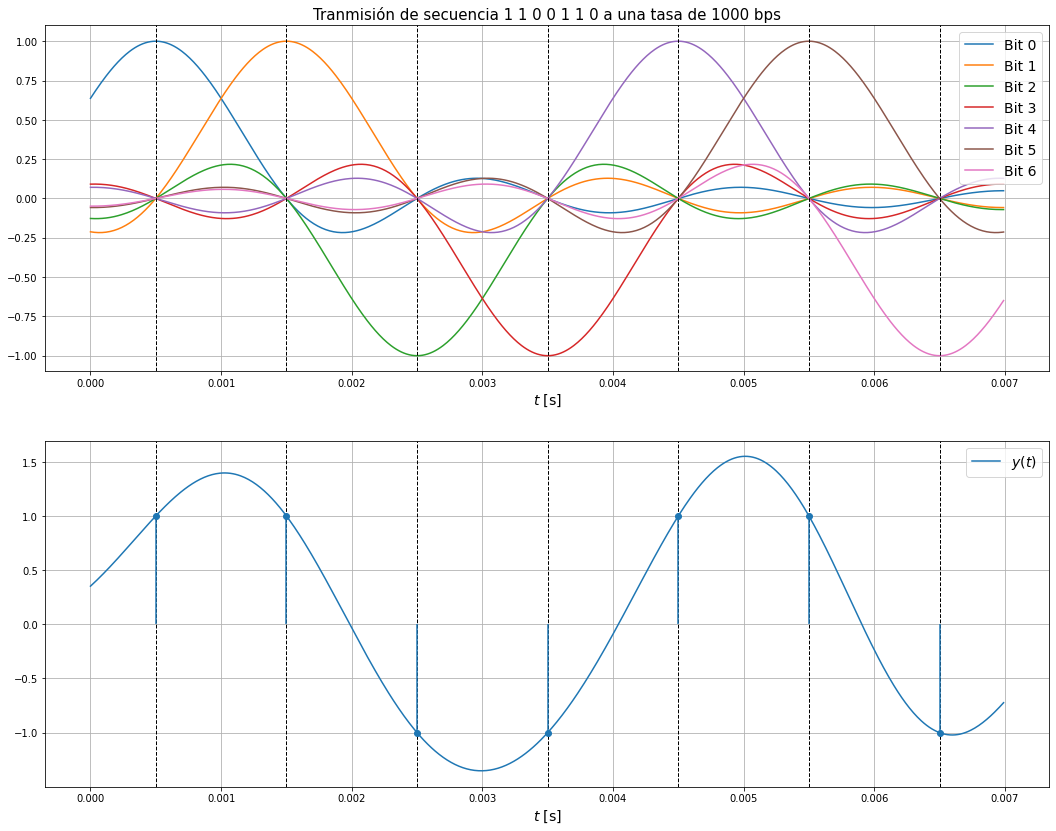

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 14))

ax1.set_title(f"Transmisión de secuencia {' '.join([str(bit) for bit in bit_stream])} a una tasa de {int(bit_rate)} bps", fontsize=15)

for slot_index, bit in enumerate(bit_stream):
    ax1.plot(t, bit_slots[slot_index,:], label=f'Bit {slot_index}')
    ax1.set_xlabel('$t$ [s]', fontsize=14)
    ax1.legend(fontsize=14)
    ax1.grid()

ax2.plot(t, y, label='$y(t)$')
ax2.set_xlabel('$t$ [s]', fontsize=14)
ax2.legend(fontsize=14)
ax2.grid()

for slot_index, bit in enumerate(bit_stream):
    ax1.axvline(x=(0.5 / bit_rate + slot_index / bit_rate), linestyle='--', color='black', linewidth=1.0)
    ax2.axvline(x=(0.5 / bit_rate + slot_index / bit_rate), linestyle='--', color='black', linewidth=1.0)
    ax2.stem(0.5 / bit_rate + slot_index / bit_rate, (bit - 0.5) * 2)

plt.show()